# <u><b>Desafio n° 3:</b></u>
<b>Analisis Exploratorio de Dataset clima en el aeropuerto de Barajas-Madrid entre los años 1997 y 2015 </b>

El dataset es originario de https://www.wunderground.com/, pero fue descargado via https://www.kaggle.com/juliansimon/weather_madrid_lemd_1997_2015.csv?select=weather_madrid_LEMD_1997_2015.csv, una comunidad de data scientist.

<b>Grupo 4</b>

<b>Integrantes</b>
<ul>
<li>Cubric, Walter</li>
<li>Flores, Roman</li>
<li>Giusti, Patricio Daniel</li>
<li>Tovar, Alan</li>
<li>Tovar, Franco</li>
</ul>
<b>Imports</b>

In [1]:
#importamos pandas
import pandas as pd
#importamos numpy
import numpy as np
#importamos Expresiones Regulares
import re
#importamos Seaborn
import seaborn as sns
#importamos matplot
import matplotlib.pyplot as plt
#importamos ip widget
from ipywidgets import interact_manual
#import para traer los ssv
#import pyreadstat
#importamos train/test
from sklearn.model_selection import train_test_split
#Importamos onehot
from sklearn.preprocessing import OneHotEncoder
#importamos Std
from sklearn.preprocessing import StandardScaler
#Importamos modelos lineales
from sklearn import linear_model
#Importamos metrics
from sklearn import metrics
#Importamos PCA
from sklearn.decomposition import PCA

In [2]:
#importacion base de datos#
df = pd.read_csv("Data/weather_madrid_LEMD_1997_2015.csv", sep=",")

#print tipo de datos
print(df.dtypes)

#ejemplo primeros tres
df.head()

CET                             object
Max TemperatureC               float64
Mean TemperatureC              float64
Min TemperatureC               float64
Dew PointC                     float64
MeanDew PointC                 float64
Min DewpointC                  float64
Max Humidity                   float64
 Mean Humidity                 float64
 Min Humidity                  float64
 Max Sea Level PressurehPa       int64
 Mean Sea Level PressurehPa      int64
 Min Sea Level PressurehPa       int64
 Max VisibilityKm              float64
 Mean VisibilityKm             float64
 Min VisibilitykM              float64
 Max Wind SpeedKm/h              int64
 Mean Wind SpeedKm/h             int64
 Max Gust SpeedKm/h            float64
Precipitationmm                float64
 CloudCover                    float64
 Events                         object
WindDirDegrees                   int64
dtype: object


,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-1-1,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-1-2,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-1-3,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-1-4,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-1-5,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [3]:
#revisamos los campos nulos en el dataframe
cant_nulos_por_campo = df.apply(lambda x: x.isnull().sum(), axis=0)
print(cant_nulos_por_campo)

#estimamos cuanto representa esa informacion faltante sobre el total de los datos que tenemos
cant_registros = df.shape[0]
print(cant_registros)


CET                               0
Max TemperatureC                  2
Mean TemperatureC                 3
Min TemperatureC                  2
Dew PointC                        2
MeanDew PointC                    2
Min DewpointC                     2
Max Humidity                      2
 Mean Humidity                    2
 Min Humidity                     2
 Max Sea Level PressurehPa        0
 Mean Sea Level PressurehPa       0
 Min Sea Level PressurehPa        0
 Max VisibilityKm               940
 Mean VisibilityKm              940
 Min VisibilitykM               940
 Max Wind SpeedKm/h               0
 Mean Wind SpeedKm/h              0
 Max Gust SpeedKm/h            3306
Precipitationmm                   0
 CloudCover                    1372
 Events                        5014
WindDirDegrees                    0
dtype: int64
6812


In [4]:
#estimamos cuanto representa esa informacion faltante sobre el total de los datos que tenemos en %

porc_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
print(porc_nulos_por_campo)

CET                             0.000000
Max TemperatureC                0.029360
Mean TemperatureC               0.044040
Min TemperatureC                0.029360
Dew PointC                      0.029360
MeanDew PointC                  0.029360
Min DewpointC                   0.029360
Max Humidity                    0.029360
 Mean Humidity                  0.029360
 Min Humidity                   0.029360
 Max Sea Level PressurehPa      0.000000
 Mean Sea Level PressurehPa     0.000000
 Min Sea Level PressurehPa      0.000000
 Max VisibilityKm              13.799178
 Mean VisibilityKm             13.799178
 Min VisibilitykM              13.799178
 Max Wind SpeedKm/h             0.000000
 Mean Wind SpeedKm/h            0.000000
 Max Gust SpeedKm/h            48.532002
Precipitationmm                 0.000000
 CloudCover                    20.140928
 Events                        73.605402
WindDirDegrees                  0.000000
dtype: float64


In [5]:
df.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')

## Definición sobre variable preponderantes para la categorización
Las variables que contamos en la prediccion que queremos realizar son : 
<ul>
    <li><b>Fecha</b>    
        CET = Dia
    <li><b>Temperatura</b><p>Es el indicador de la cantidad de energía calorífica acumulada en el aire
        <ul>
            <li>Max TemperatureC = Max tem
            <li>Mean TemperatureC = Promed temp
            <li>Min TemperatureC = Min Temp
        </ul><p>
    <li><b>Punto de rocío</b><p>es la más alta temperatura a la que empieza a condensarse el vapor de agua contenido en el aire, produciendo rocío, neblina, cualquier tipo de nube o, en caso de que la temperatura sea lo suficientemente baja, escarcha
        <ul>
            <li>Dew PointC = Punto de rocío Max
            <li>MeanDew PointC = Promed Punto rocio
            <li>Min DewpointC = Min Punto rocio
        </ul><p>
    <li><b>Humedad</b> <p>indica la cantidad de vapor de agua que se encuentra presente en el aire.
        <ul>
            <li>Max Humidity = Max humedad
            <li> Mean Humidity = Promed humedad
            <li> Min Humidity = Min humedad
        </ul><p>
    <li><b>Presión atmosférica</b> <p>es el peso de la masa de aire por cada unidad de superficie.
        <ul>
            <li> Max Sea Level PressurehPa = Max humedad
            <li> Mean Sea Level PressurehPa = Promed humedad
            <li> Min Sea Level PressurehPa = Min humedad
        </ul><p>
    <li><b>Visibilidad</b> <p>Se define la “visibilidad meteorológica" como la distancia máxima a la que un objeto negro, de tamaño especificado, puede ser visto y reconocido contra el horizonte por un observador normal, sin que intervenga un procedimiento de iluminación
        <ul>
                <li> Max VisibilityKm = Visibilidad maxima en km
                <li> Mean VisibilityKm = Visibilidad Promed en km
                <li> Min VisibilitykM = Visibilidad minen km
        </ul><p>
    <li><b>Velocidad del viento</b> <p>La velocidad del viento mide la componente horizontal del desplazamiento del aire en un punto y en un instante determinados. 
        <ul>
            <li> Max Wind SpeedKm/h = Viento Max Km/h
            <li> Mean Wind SpeedKm/h = Viento Promed Km/h
            <li> Max Gust SpeedKm/h = Viento min Km/h
        </ul><p>
    <li><b>Precipitación en mm</b><p>La precipitación pluvial se mide en mm, que sería el espesor de la lámina de agua que se formaría, a causa de la precipitación, sobre una superficie plana e impermeable y que equivale a litros de agua por metro cuadrado de terreno (l/m²)
        <ul>
            <li>Precipitationmm = Presipitacion en mm
        </ul><p>
    <li> CloudCover = Covertura de Nubes en escala de 0 a 8
    <li> Events = Clima del dia
    <li>WindDirDegrees = Direccion del viento en grados
    </ul>



In [57]:
df[" Events"].unique()

KeyError: ' Events'

In [58]:
df.rename(columns={' CloudCover':'CloudCover',' Events':'Events'}, inplace = True)

In [59]:
df.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees',
       'eventos_completo'],
      dtype='object')

In [60]:
nubes_null = df["CloudCover"].isnull()
nubes_null_y_lluvia = df[nubes_null]["Precipitationmm"].unique()
print("NAN nubes y precipitación únicos" , nubes_null_y_lluvia)
nubes_null_y_clima_unicos = df[nubes_null]["Events"].unique()
print("NAN nubes y clima únicos", nubes_null_y_clima_unicos)
nubes_0 = df["CloudCover"] == 0
nubes_0_y_lluvia_unicos = df[nubes_0]["Precipitationmm"].unique()
print("sin nubes y lluvia únicos",nubes_0_y_lluvia_unicos)
nubes_0_y_lluvia_unicos = df[nubes_0]["Events"].unique()
print("sin nubes y clima únicos",nubes_0_y_lluvia_unicos)
#df.groupby(by=[' Events'],as_index=False)["Precipitationmm"].agg(['count'])
df[nubes_null]["Events"].isnull()

NAN nubes y precipitación únicos []
NAN nubes y clima únicos []
sin nubes y lluvia únicos [0.]
sin nubes y clima únicos [nan 'Fog']


Series([], Name: Events, dtype: bool)

In [61]:
#Podemos decir entonces que los que son nullos o tienen nubes 0, son dias soleados, ya que poseen ausencia de precipitaciones. 
#Podemos Remplazar entonces en el DF completo estos datos.  
df_1 = df
df_1["eventos_completo"] = df_1["Events"]

In [62]:
df_1

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,eventos_completo
0,1997-1-1,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,9.0,4.0,13,6,NaN,0.00,6.0,NaN,229,NaN
1,1997-1-2,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143,Rain
2,1997-1-3,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256,Rain-Snow
3,1997-1-4,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,27,19,40.0,0.00,2.0,NaN,284,NaN
4,1997-1-5,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,5.0,1.0,14,6,NaN,0.00,7.0,Snow,2,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38,Fog
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243,Rain
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190,Fog-Rain
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,...,10.0,6.0,14,5,34.0,0.00,6.0,NaN,256,NaN


In [63]:
soleado_1 = df_1["CloudCover"].isna()
df_1.loc[soleado_1, "CloudCover"] = 0
df_1["CloudCover"].unique()


array([6., 5., 2., 7., 4., 3., 1., 0., 8.])

In [64]:
soleado_2 = df_1["CloudCover"] == 0
df_1.loc[soleado_2, "eventos_completo"] = "Sunny"

In [65]:
df_1[df_1.eventos_completo=="Sunny"]

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,eventos_completo
40,1997-2-10,14.0,7.0,0.0,5.0,3.0,-1.0,100.0,76.0,51.0,...,11.719857,9.134877,8,3,NaN,0.0,0.0,NaN,284,Sunny
49,1997-2-19,18.0,10.0,2.0,7.0,4.0,2.0,100.0,71.0,40.0,...,11.719857,9.134877,11,3,NaN,0.0,0.0,NaN,287,Sunny
50,1997-2-20,19.0,10.0,2.0,7.0,5.0,2.0,100.0,72.0,43.0,...,9.000000,8.000000,8,2,NaN,0.0,0.0,NaN,254,Sunny
58,1997-2-28,21.0,11.0,2.0,5.0,2.0,0.0,93.0,59.0,28.0,...,11.719857,9.134877,10,3,NaN,0.0,0.0,NaN,347,Sunny
59,1997-3-1,21.0,12.0,4.0,6.0,4.0,3.0,93.0,65.0,33.0,...,11.719857,9.134877,8,5,NaN,0.0,0.0,NaN,339,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,2015-12-19,16.0,9.0,2.0,5.0,3.0,1.0,100.0,74.0,31.0,...,10.000000,6.000000,11,6,NaN,0.0,0.0,NaN,340,Sunny
6802,2015-12-22,16.0,8.0,0.0,6.0,3.0,-1.0,100.0,78.0,36.0,...,12.000000,5.000000,10,5,NaN,0.0,0.0,NaN,344,Sunny
6803,2015-12-23,15.0,8.0,0.0,5.0,2.0,-1.0,100.0,78.0,35.0,...,12.000000,3.000000,10,5,23.0,0.0,0.0,NaN,343,Sunny
6804,2015-12-24,11.0,6.0,0.0,5.0,2.0,-1.0,100.0,84.0,54.0,...,8.000000,4.000000,10,5,NaN,0.0,0.0,NaN,360,Sunny


In [66]:
df_1["eventos_completo"].unique()

array([nan, 'Rain', 'Rain-Snow', 'Snow', 'Fog', 'Fog-Rain', 'Sunny',
       'Rain-Thunderstorm', 'Thunderstorm', 'Rain-Hail-Thunderstorm',
       'Fog-Thunderstorm', 'Tornado', 'Fog-Rain-Thunderstorm',
       'Fog-Rain-Snow', 'Fog-Snow', 'Rain-Snow-Thunderstorm', 'Rain-Hail'],
      dtype=object)

In [67]:
nubes_1 = df_1["CloudCover"] == 1
nubes_1_y_lluvia_unicos = df_1[nubes_1]["Precipitationmm"].unique()
print("Nubes 1 y lluvia únicos",nubes_1_y_lluvia_unicos)
nubes_1_y_lluvia_unicos = df_1[nubes_1]["Events"].unique()
print("Nubes 1 y clima únicos",nubes_1_y_lluvia_unicos)
#df.groupby(by=[' Events'],as_index=False)["Precipitationmm"].agg(['count'])

Nubes 1 y lluvia únicos [0.   1.02]
Nubes 1 y clima únicos [nan 'Fog' 'Thunderstorm' 'Fog-Thunderstorm' 'Rain-Thunderstorm' 'Rain'
 'Fog-Rain']


In [68]:
df_1['eventos_completo'] = np.where((df_1['CloudCover'] == 1)
                           & (df_1['Precipitationmm'] == 0) & (df_1['eventos_completo'].isnull()), #identificamos las caracteristicas
                           "Sunny",      #Valor a reemplazar
                           df_1['eventos_completo'])  #donde reemplazar

In [69]:
print("Nubes 1 y clima únicos",nubes_1_y_lluvia_unicos)
df_1[df_1.eventos_completo=="Sunny"]

Nubes 1 y clima únicos [nan 'Fog' 'Thunderstorm' 'Fog-Thunderstorm' 'Rain-Thunderstorm' 'Rain'
 'Fog-Rain']


,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,eventos_completo
11,1997-1-12,17.0,10.0,3.0,8.0,6.0,3.0,100.0,84.0,55.0,...,10.000000,10.000000,14,8,NaN,0.0,1.0,NaN,345,Sunny
34,1997-2-4,12.0,6.0,0.0,3.0,2.0,0.0,100.0,71.0,51.0,...,10.000000,10.000000,11,5,NaN,0.0,1.0,NaN,239,Sunny
39,1997-2-9,14.0,7.0,-1.0,5.0,2.0,-2.0,93.0,74.0,51.0,...,10.000000,10.000000,10,3,NaN,0.0,1.0,NaN,359,Sunny
40,1997-2-10,14.0,7.0,0.0,5.0,3.0,-1.0,100.0,76.0,51.0,...,11.719857,9.134877,8,3,NaN,0.0,0.0,NaN,284,Sunny
47,1997-2-17,15.0,8.0,2.0,5.0,3.0,1.0,100.0,75.0,39.0,...,10.000000,10.000000,14,5,NaN,0.0,1.0,NaN,190,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6799,2015-12-19,16.0,9.0,2.0,5.0,3.0,1.0,100.0,74.0,31.0,...,10.000000,6.000000,11,6,NaN,0.0,0.0,NaN,340,Sunny
6802,2015-12-22,16.0,8.0,0.0,6.0,3.0,-1.0,100.0,78.0,36.0,...,12.000000,5.000000,10,5,NaN,0.0,0.0,NaN,344,Sunny
6803,2015-12-23,15.0,8.0,0.0,5.0,2.0,-1.0,100.0,78.0,35.0,...,12.000000,3.000000,10,5,23.0,0.0,0.0,NaN,343,Sunny
6804,2015-12-24,11.0,6.0,0.0,5.0,2.0,-1.0,100.0,84.0,54.0,...,8.000000,4.000000,10,5,NaN,0.0,0.0,NaN,360,Sunny


In [70]:
conteo = df_1['eventos_completo'].value_counts()
conteo

Sunny                     2639
Rain                      1140
Rain-Thunderstorm          247
Fog                        217
Fog-Rain                    69
Thunderstorm                45
Rain-Snow                   33
Snow                        14
Rain-Hail-Thunderstorm       7
Fog-Snow                     4
Fog-Rain-Snow                1
Rain-Hail                    1
Fog-Rain-Thunderstorm        1
Tornado                      1
Rain-Snow-Thunderstorm       1
Fog-Thunderstorm             1
Name: eventos_completo, dtype: int64

In [151]:
df_2 = df_1[~df_1['eventos_completo'].isin(conteo[conteo < 100].index)]
df_2

df_2['eventos_completo'] = np.where((df_2['eventos_completo']=="Rain-Thunderstorm")  , #identificamos las caracteristicas
                           "Rain",      #Valor a reemplazar
                           df_2['eventos_completo'])  #donde reemplazar


#df_1['eventos_completo'] = np.where((df_1['eventos_completo']=="Fog-Rain")|(df_1['eventos_completo']=="Rain-Hail-Thunderstorm")|
#                             (df_1['eventos_completo']=="Tornado")|(df_1['eventos_completo']=="Rain-Snow-Thunderstorm")|(df_1['eventos_completo']=="Rain-Hail")
#                                  |(df_1['eventos_completo']=="Fog-Rain-Thunderstorm") | (df_1['eventos_completo']=="Rain-Thunderstorm")           , #identificamos las caracteristicas
#                           "Rain",      #Valor a reemplazar
#                           df_1['eventos_completo'])  #donde reemplazar

#df_1['eventos_completo'] = np.where((df_1['eventos_completo']=="Rain-Snow")|(df_1['eventos_completo']=="Fog-Snow")|(df_1['eventos_completo']=="Fog-Rain-Snow"), #identificamos las caracteristicas
#                           "Snow",      #Valor a reemplazar
#                           df_1['eventos_completo'])  #donde reemplazar

#df_1['eventos_completo'] = np.where((df_1['eventos_completo']=="Fog-Thunderstorm"), #identificamos las caracteristicas
#                          "Thunderstorm",      #Valor a reemplazar
#                           df_1['eventos_completo'])  #donde reemplazar


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
df_2['eventos_completo'].value_counts()

Sunny    2639
Rain     1387
Fog       217
Name: eventos_completo, dtype: int64

In [153]:
#Detectamos que en las columnas de visibilidad hay datos faltantes en los días soleados, por lo que imputaremos por la media
df_2[' Max VisibilityKm'] = np.where((df_2[' Max VisibilityKm'].isnull()), #identificamos las caracteristicas
                           df_2[" Max VisibilityKm"].mean(),      #Valor a reemplazar
                           df_2[' Max VisibilityKm'])  #donde reemplazar
df_2[' Mean VisibilityKm'] = np.where((df_2[' Mean VisibilityKm'].isnull()), #identificamos las caracteristicas
                           df_2[" Mean VisibilityKm"].mean(),      #Valor a reemplazar
                           df_2[' Mean VisibilityKm'])  #donde reemplazar
df_2[' Min VisibilitykM'] = np.where((df_2[' Min VisibilitykM'].isnull()), #identificamos las caracteristicas
                           df_2[" Min VisibilitykM"].mean(),      #Valor a reemplazar
                           df_2[' Min VisibilitykM'])  #donde reemplazar

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [154]:
cant_nulos_por_campo_1 = df_2.apply(lambda x: x.isnull().sum(), axis=0)
print("       nuevo",cant_nulos_por_campo_1/cant_registros)

       nuevo CET                            0.000000
Max TemperatureC               0.000294
Mean TemperatureC              0.000440
Min TemperatureC               0.000294
Dew PointC                     0.000294
MeanDew PointC                 0.000294
Min DewpointC                  0.000294
Max Humidity                   0.000294
 Mean Humidity                 0.000294
 Min Humidity                  0.000294
 Max Sea Level PressurehPa     0.000000
 Mean Sea Level PressurehPa    0.000000
 Min Sea Level PressurehPa     0.000000
 Max VisibilityKm              0.000000
 Mean VisibilityKm             0.000000
 Min VisibilitykM              0.000000
 Max Wind SpeedKm/h            0.000000
 Mean Wind SpeedKm/h           0.000000
 Max Gust SpeedKm/h            0.472989
Precipitationmm                0.000000
CloudCover                     0.000000
Events                         0.736054
WindDirDegrees                 0.000000
eventos_completo               0.350998
dtype: float64


## Preparacion de datos


In [155]:
df_estudio = df_2
#dropeamos la columna Max Gust SpeedKm/h
df_estudio = df_estudio.drop(columns=[' Max Gust SpeedKm/h',"Events","CET"])

In [156]:
# Eliminamos los registros con valores faltantes ya que son sólo un 13% del dataset
df_estudio.dropna(inplace=True)

In [157]:
df_estudio.apply(lambda x: x.isnull().sum(), axis=0)

Max TemperatureC               0
Mean TemperatureC              0
Min TemperatureC               0
Dew PointC                     0
MeanDew PointC                 0
Min DewpointC                  0
Max Humidity                   0
 Mean Humidity                 0
 Min Humidity                  0
 Max Sea Level PressurehPa     0
 Mean Sea Level PressurehPa    0
 Min Sea Level PressurehPa     0
 Max VisibilityKm              0
 Mean VisibilityKm             0
 Min VisibilitykM              0
 Max Wind SpeedKm/h            0
 Mean Wind SpeedKm/h           0
Precipitationmm                0
CloudCover                     0
WindDirDegrees                 0
eventos_completo               0
dtype: int64

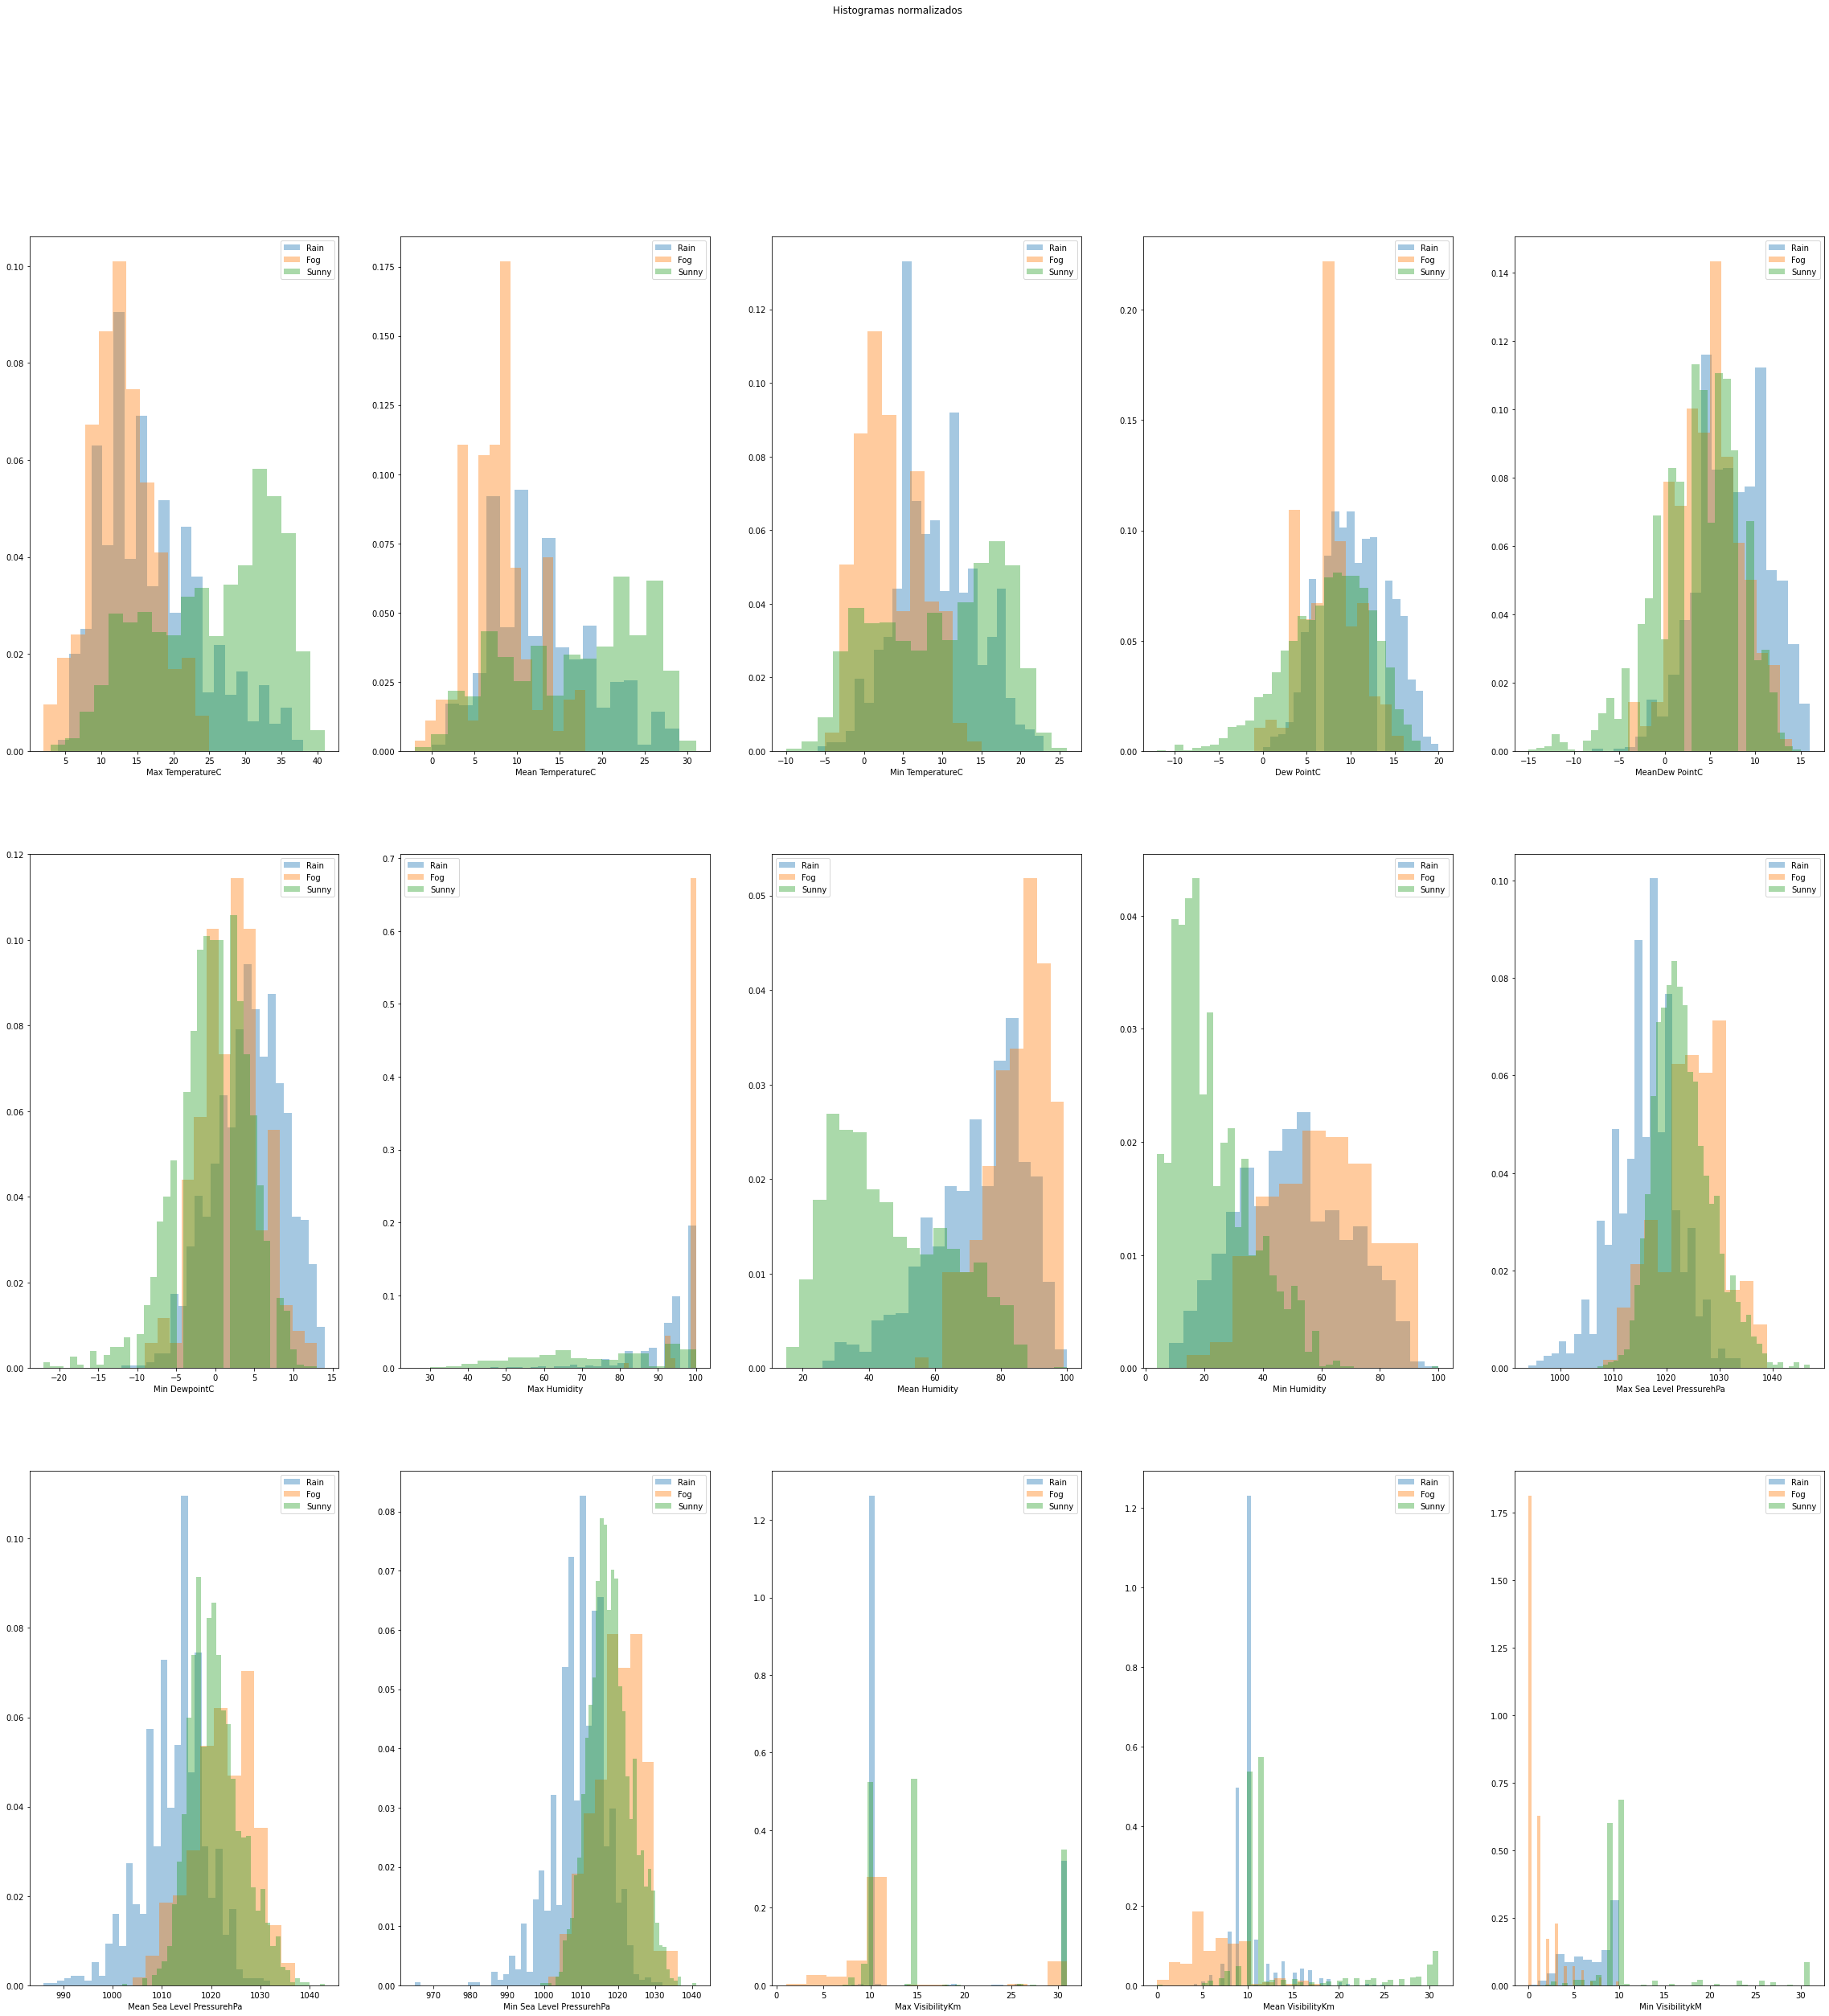

In [161]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(40,40))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(df_estudio.columns[:-1], axes.flatten()):
    sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Rain', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Rain-Snow', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Snow', c].dropna(), norm_hist=True, kde=False, ax=ax)
    sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Fog', c].dropna(), norm_hist=True, kde=False, ax=ax)
    sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Sunny', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Fog-Rain', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Rain-Thunderstorm', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Thunderstorm', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Rain-Hail-Thunderstorm', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Fog-Thunderstorm', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Tornado', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Fog-Rain-Thunderstorm', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Fog-Rain-Snow', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Fog-Snow', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Rain-Snow-Thunderstorm', c].dropna(), norm_hist=True, kde=False, ax=ax)
    #sns.distplot(df_estudio.loc[df_estudio['eventos_completo']=='Rain-Hail', c].dropna(), norm_hist=True, kde=False, ax=ax)
#    ax.legend(['Rain','Rain-Snow','Snow','Fog','Sunny','Fog-Rain','Rain-Thunderstorm','Thunderstorm','Rain-Hail-Thunderstorm','Fog-Thunderstorm','Tornado','Fog-Rain-Thunderstorm','Fog-Rain-Snow','Fog-Snow','Rain-Snow-Thunderstorm','Rain-Hail'])
    ax.legend(['Rain','Fog','Sunny'])


<AxesSubplot:>

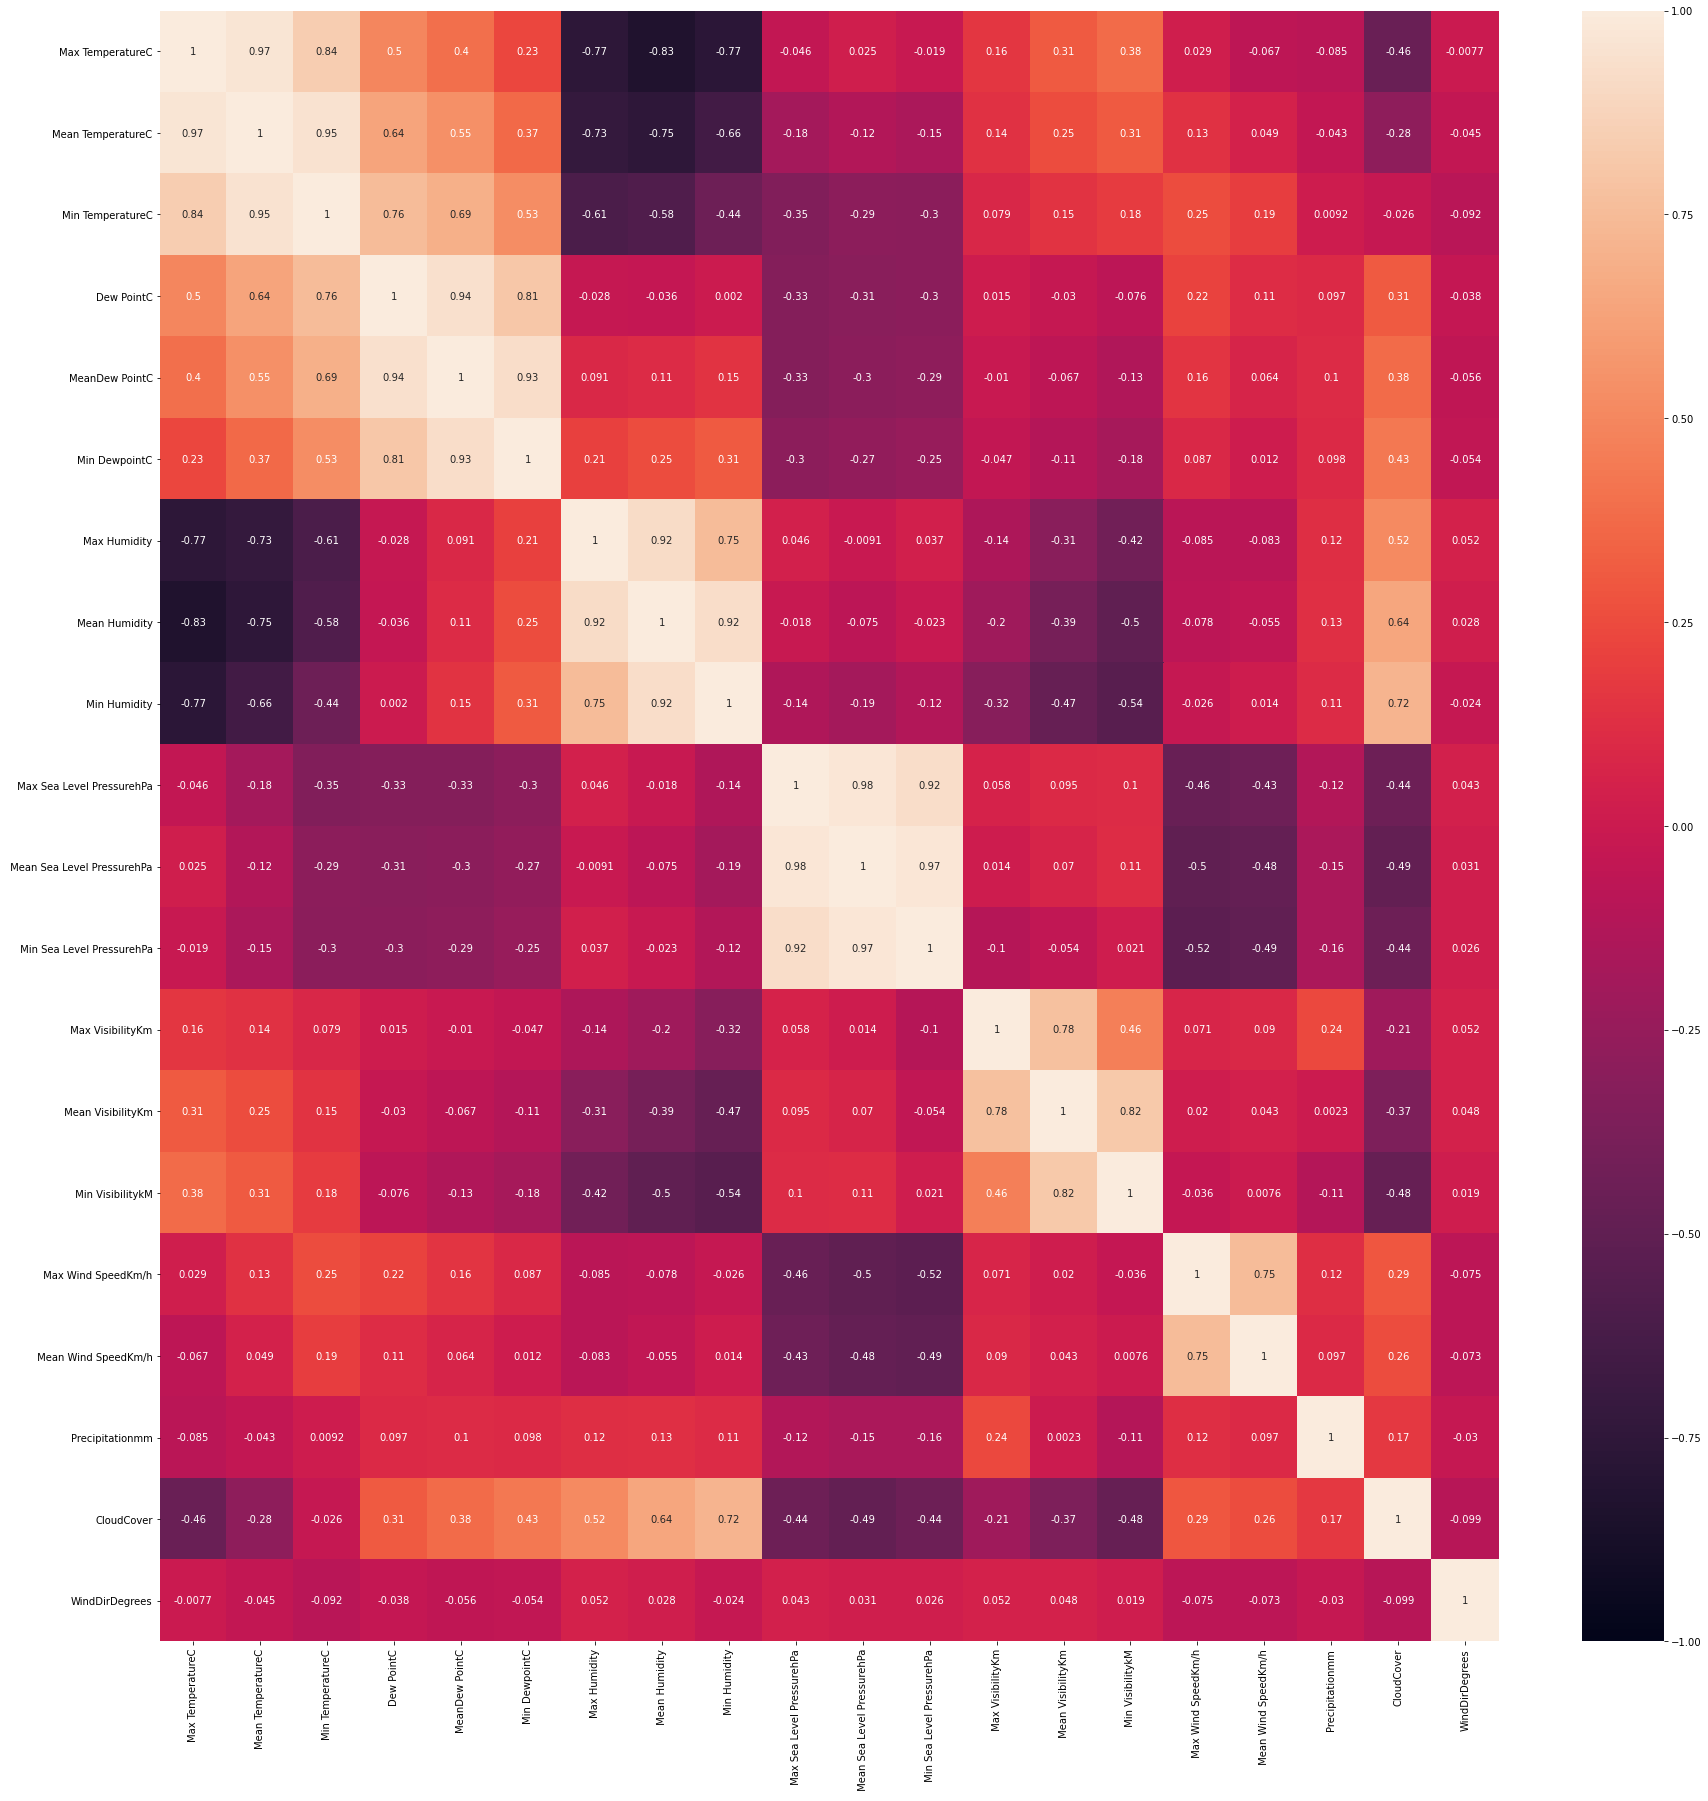

In [162]:
plt.figure(figsize=(30,30))
sns.heatmap(df_estudio.corr(), annot=True, vmin=-1)

## Separacion de informacion en categorica y no categorica

In [163]:
df_estudio["eventos_completo"] = df_estudio["eventos_completo"].astype(np.object)    

In [164]:
#categorical_columns
categorical_columns = [col for col in df_estudio.columns if df_estudio[col].dtypes == 'object']

In [165]:
non_categorical_columns = [col for col in df_estudio.columns if df_estudio[col].dtypes != 'object']

print("non categorical inicial: " + str(len(non_categorical_columns)))
print("categorical inicial: " + str(len(categorical_columns)))

non_categorical_columns_clean = []
new_categorical_columns = []

for col in non_categorical_columns:
    values = df_estudio[col].value_counts()
    if len(values) <= 5:
        categorical_columns.append(col)
        new_categorical_columns.append(col)
    else:
        non_categorical_columns_clean.append(col)


print("non categorical final: " + str(len(non_categorical_columns_clean)))
print("categorical final: " + str(len(categorical_columns)))
print(new_categorical_columns)

non categorical inicial: 20
categorical inicial: 1
non categorical final: 20
categorical final: 1
[]


In [166]:
df_estudio

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees,eventos_completo
1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,...,997,10.0,9.0,4.0,26,8,0.00,5.0,143,Rain
7,8.0,4.0,1.0,7.0,4.0,1.0,100.0,96.0,87.0,1015,...,1003,10.0,8.0,4.0,26,8,0.00,7.0,273,Rain
8,12.0,10.0,8.0,8.0,3.0,0.0,100.0,65.0,44.0,1015,...,1003,10.0,10.0,10.0,48,23,0.00,4.0,274,Rain
10,16.0,10.0,5.0,10.0,7.0,5.0,100.0,90.0,67.0,1024,...,1021,10.0,6.0,0.0,11,2,0.00,3.0,344,Fog
11,17.0,10.0,3.0,8.0,6.0,3.0,100.0,84.0,55.0,1024,...,1020,10.0,10.0,10.0,14,8,0.00,1.0,345,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,11.0,6.0,0.0,5.0,2.0,-1.0,100.0,84.0,54.0,1034,...,1028,18.0,8.0,4.0,10,5,0.00,0.0,360,Sunny
6805,14.0,6.0,-2.0,6.0,2.0,-2.0,100.0,83.0,45.0,1036,...,1031,14.0,5.0,2.0,14,5,0.00,0.0,349,Sunny
6807,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,1035,...,1027,31.0,14.0,5.0,14,6,0.00,8.0,38,Fog
6808,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,1031,...,1023,31.0,14.0,8.0,27,8,0.51,7.0,243,Rain


In [167]:
from sklearn.preprocessing import LabelBinarizer
X = df_estudio.drop('eventos_completo', axis = 1)
#Y = OneHotEncoder().fit_transform(df_estudio[['eventos_completo']]).toarray()
#Y = pd.get_dummies(df_estudio[['eventos_completo']])
#Y = LabelBinarizer().fit_transform(df_estudio[['eventos_completo']])
Y = df_estudio[['eventos_completo']]


In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1237)
X_train.shape
Y_train.shape


(2968, 1)

In [169]:
#Y_train = OneHotEncoder().fit_transform(Y_train).toarray()
#Y_test = OneHotEncoder().fit_transform(Y_test).toarray()


In [170]:
# recalculo categorical_columns porque hay algunas columnas que fueron dropeadas por % de nulos:
categorical_columns = [col for col in df_estudio.columns if df_estudio[col].dtypes == 'object']

encoder_categories = []

for col in categorical_columns:    
    col_categories = df_estudio[col].unique()
    encoder_categories.append(col_categories)

encoder_categories

[array(['Rain', 'Fog', 'Sunny'], dtype=object)]

In [171]:
#estandarizamos las no categoricas
non_categorical_columns = [col for col in X_train.columns if col not in categorical_columns]
non_categorical_columns

std_sclr = StandardScaler()
std_sclr_trained = std_sclr.fit(X_train[non_categorical_columns])
X_train_numerical = std_sclr_trained.transform(X_train[non_categorical_columns])
X_train_numerical_scaled = pd.DataFrame(X_train_numerical, columns = non_categorical_columns)
X_train_numerical_scaled.head()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
0,-0.430670,-0.798984,-1.262493,-0.642716,-0.600919,-0.433379,1.071705,0.591140,-0.146213,1.428045,1.593691,1.473870,-0.111559,-0.109676,-0.027674,-1.147037,-0.592748,-0.132126,-0.885028,1.265945
1,-0.651454,-0.539972,-0.256643,0.611997,0.679125,0.766499,1.071705,1.209626,0.928307,-1.167166,-1.617395,-2.217069,1.251011,-0.398296,-0.410968,0.162815,0.853345,3.291283,0.939430,0.017058
2,-0.099494,-0.539972,-0.975107,-1.060954,-0.814260,-0.433379,0.046852,-0.265226,-0.488105,0.512088,0.571982,0.653661,-0.668790,-0.398296,0.127650,-0.744006,-0.799332,-0.132126,-0.428914,0.764747
3,-0.651454,-0.410466,0.030743,0.402878,0.679125,0.966478,1.071705,0.876595,1.074832,-1.777804,-1.617395,-1.396861,-0.668790,-0.398296,-0.231429,-0.240216,-0.592748,-0.132126,1.395545,0.641502
4,1.445995,1.532124,1.323979,0.611997,-0.174238,-0.833338,-1.679216,-1.644926,-1.416099,-0.403869,-0.449727,-0.713353,1.850949,2.790213,1.563965,1.371909,0.853345,-0.132126,-0.885028,0.033491


In [172]:
X_test_numerical = std_sclr_trained.transform(X_test[non_categorical_columns])
X_test_numerical_scaled = pd.DataFrame(X_test_numerical, columns = non_categorical_columns)
X_test_numerical_scaled.head()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
0,-0.430670,-0.151454,0.174436,0.611997,0.892466,1.366438,0.748067,1.066898,1.074832,0.359429,0.134107,0.106856,-0.668790,-0.398296,0.127650,-0.542490,0.233591,-0.132126,1.395545,-1.535834
1,0.010898,-0.280960,-0.544029,-0.433597,-0.387579,-0.433379,0.370490,-0.217650,-0.292738,0.664748,0.571982,0.243557,-0.668790,-0.398296,0.127650,-0.240216,-0.179578,-0.132126,-0.428914,-1.125016
2,-2.196943,-1.964537,-1.549879,-1.479191,-1.027601,-0.633359,1.071705,2.018415,2.930820,0.359429,0.426024,0.516960,-1.388715,-1.908642,-1.667744,-1.046279,-1.212502,-0.132126,2.307774,-0.648467
3,0.121290,0.366570,0.605515,1.657591,1.319148,1.166458,1.071705,0.448412,0.439889,-0.251209,-0.157810,-0.029846,1.850949,-0.230479,-0.770047,0.162815,-0.592748,-0.132126,0.483316,-0.073322
4,0.783642,1.014100,1.180286,-0.015360,0.039103,0.166560,-1.679216,-1.169167,-0.488105,-1.014507,-0.887602,-0.713353,-0.668790,-0.398296,0.127650,0.263573,0.440176,-0.132126,-0.428914,0.526473


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import normalize

In [174]:
models = [LogisticRegression(),
          KNeighborsClassifier()]

In [175]:
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']},
    {'n_neighbors': range(1,200),
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]}
]

In [176]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [177]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, Y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 200), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [178]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.9063267813267813
LogisticRegression(C=1, penalty='l1', solver='saga')
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.9194626444626446
KNeighborsClassifier(n_neighbors=8, p=1)
{'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}


In [179]:
pd.DataFrame(grids[1].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018250,0.002046,0.016655,0.002993,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.905724,0.922559,...,0.885522,0.922559,0.912458,0.885522,0.922559,0.871622,0.885135,0.899918,0.018357,95
1,0.017057,0.002252,0.007976,0.000769,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.905724,0.922559,...,0.885522,0.922559,0.912458,0.885522,0.922559,0.871622,0.885135,0.899918,0.018357,95
2,0.019946,0.004184,0.014960,0.002093,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.878788,0.878788,...,0.875421,0.905724,0.898990,0.878788,0.902357,0.864865,0.871622,0.882403,0.013846,280
3,0.016455,0.002610,0.006683,0.000898,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.878788,0.878788,...,0.875421,0.905724,0.898990,0.878788,0.902357,0.864865,0.871622,0.882403,0.013846,280
4,0.018353,0.003347,0.046074,0.005672,1,3,uniform,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}",0.892256,0.868687,...,0.848485,0.895623,0.898990,0.875421,0.909091,0.861486,0.864865,0.879032,0.018239,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0.018453,0.002495,0.030317,0.004307,199,1,distance,"{'n_neighbors': 199, 'p': 1, 'weights': 'dista...",0.875421,0.865320,...,0.851852,0.861953,0.882155,0.885522,0.861953,0.871622,0.844595,0.863204,0.015987,615
1190,0.016657,0.003000,0.031115,0.003304,199,2,uniform,"{'n_neighbors': 199, 'p': 2, 'weights': 'unifo...",0.838384,0.835017,...,0.828283,0.818182,0.858586,0.851852,0.835017,0.831081,0.797297,0.830178,0.017631,1141
1191,0.017253,0.003027,0.023438,0.002328,199,2,distance,"{'n_neighbors': 199, 'p': 2, 'weights': 'dista...",0.841751,0.838384,...,0.831650,0.835017,0.868687,0.858586,0.838384,0.844595,0.807432,0.837930,0.017159,1030
1192,0.017057,0.002908,0.150099,0.012717,199,3,uniform,"{'n_neighbors': 199, 'p': 3, 'weights': 'unifo...",0.838384,0.821549,...,0.824916,0.811448,0.848485,0.841751,0.821549,0.824324,0.787162,0.822765,0.016992,1193


In [180]:
y_preds_log = grids[0].predict(X_test)
y_preds_knn = grids[1].predict(X_test)


In [181]:
print (classification_report(Y_test, y_preds_log))

              precision    recall  f1-score   support

         Fog       0.96      0.31      0.47        77
        Rain       0.84      0.89      0.86       445
       Sunny       0.93      0.96      0.94       750

    accuracy                           0.90      1272
   macro avg       0.91      0.72      0.76      1272
weighted avg       0.90      0.90      0.89      1272



              precision    recall  f1-score   support

         Fog       0.96      0.31      0.47        77
        Rain       0.84      0.89      0.86       445
       Sunny       0.93      0.96      0.94       750

    accuracy                           0.90      1272
   macro avg       0.91      0.72      0.76      1272
weighted avg       0.90      0.90      0.89      1272



<AxesSubplot:>

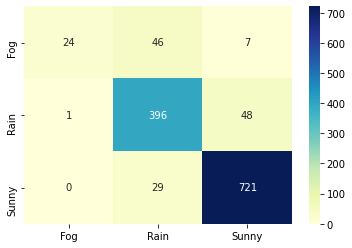

In [182]:
print (classification_report(Y_test, y_preds_log))
confu_mtx = pd.DataFrame(confusion_matrix(Y_test, y_preds_log), 
  index = [ 'Fog','Rain','Sunny'],
  columns = [ 'Fog','Rain','Sunny'])
#  index = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#  columns = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])
#  index = [ 'Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
 # columns = ['Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])


sns.heatmap(confu_mtx , annot=True, fmt='d', cmap='YlGnBu')


In [183]:
print (classification_report(Y_test, y_preds_knn))

              precision    recall  f1-score   support

         Fog       0.79      0.55      0.65        77
        Rain       0.90      0.89      0.90       445
       Sunny       0.94      0.97      0.96       750

    accuracy                           0.92      1272
   macro avg       0.88      0.80      0.83      1272
weighted avg       0.92      0.92      0.92      1272



<AxesSubplot:>

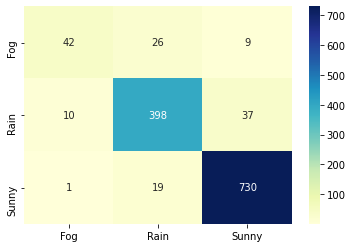

In [184]:
confu_mtx = pd.DataFrame(confusion_matrix(Y_test, y_preds_knn), 
  index = [ 'Fog','Rain','Sunny'],
  columns = [ 'Fog','Rain','Sunny'])

#  index = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#  columns = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])

#  index = [ 'Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#  columns = ['Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])

sns.heatmap(confu_mtx , annot=True, fmt='d', cmap='YlGnBu')

In [185]:
from sklearn.naive_bayes import GaussianNB
#naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_preds_nb = gnb.predict(X_test)
Y_preds_nb

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array(['Rain', 'Sunny', 'Fog', ..., 'Sunny', 'Sunny', 'Sunny'],
      dtype='<U5')

              precision    recall  f1-score   support

         Fog       0.54      0.83      0.66        77
        Rain       0.97      0.88      0.92       445
       Sunny       0.97      0.97      0.97       750

    accuracy                           0.93      1272
   macro avg       0.83      0.89      0.85      1272
weighted avg       0.94      0.93      0.94      1272



<AxesSubplot:>

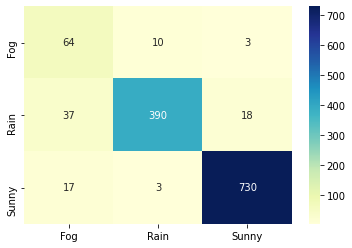

In [186]:
print (classification_report(Y_test, Y_preds_nb))
confu_mtx = pd.DataFrame(confusion_matrix(Y_test, Y_preds_nb), 
  index = [ 'Fog','Rain','Sunny'],
  columns = [ 'Fog','Rain','Sunny'])

#  index = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#  columns = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])
                        
#index = [ 'Fog','Fog-Rain','Fog-Snow','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#columns = ['Fog','Fog-Rain','Fog-Snow','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])

sns.heatmap(confu_mtx , annot=True, fmt='d', cmap='YlGnBu')

## Reduccion de dimensionalidad
Vamos a testear si la reduccion de dimensionalidad mejora las predicciones

In [187]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');
        

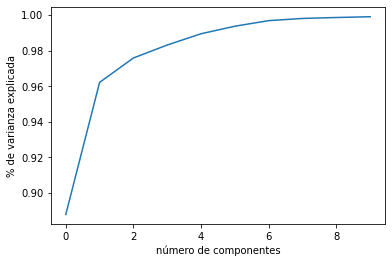

In [188]:
plot_explained_variance(components_count = 10, X = X_train)

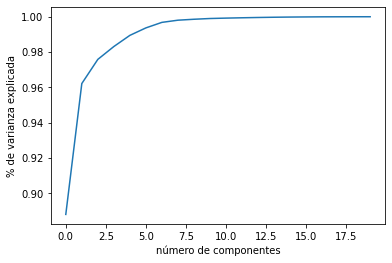

In [189]:
plot_explained_variance(components_count = 20, X = X_train)

In [190]:
#Elegimos 10 futures ya que son menos de lso que habia en el original
model_pca = PCA(20).fit(X_train)
X_train_PCA = model_pca.transform(X_train)
X_test_PCA = model_pca.transform(X_test)

In [191]:
#corremos nuevamente grid, pero sobre el nuevo X_train
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train_PCA, Y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 200), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')


C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [192]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.9686595686595687
LogisticRegression(C=1, penalty='l1', solver='saga')
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.9133986258986259
KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')
{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


In [193]:
y_preds_log = grids[0].predict(X_test_PCA)
y_preds_knn = grids[1].predict(X_test_PCA)

              precision    recall  f1-score   support

         Fog       0.86      0.79      0.82        77
        Rain       0.95      0.96      0.96       445
       Sunny       0.98      0.98      0.98       750

    accuracy                           0.96      1272
   macro avg       0.93      0.91      0.92      1272
weighted avg       0.96      0.96      0.96      1272



<AxesSubplot:>

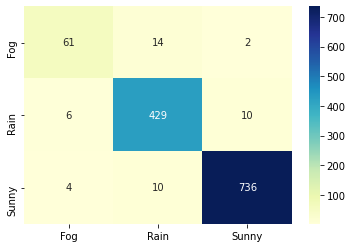

In [194]:
print (classification_report(Y_test, y_preds_log))
confu_mtx = pd.DataFrame(confusion_matrix(Y_test, y_preds_log), 
  index = [ 'Fog','Rain','Sunny'],
  columns = [ 'Fog','Rain','Sunny'])

#  index = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#  columns = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])
                        
                         
#  index = [ 'Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#  columns = ['Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])

sns.heatmap(confu_mtx , annot=True, fmt='d', cmap='YlGnBu')


              precision    recall  f1-score   support

         Fog       0.80      0.36      0.50        77
        Rain       0.88      0.89      0.89       445
       Sunny       0.93      0.97      0.95       750

    accuracy                           0.91      1272
   macro avg       0.87      0.74      0.78      1272
weighted avg       0.90      0.91      0.90      1272



<AxesSubplot:>

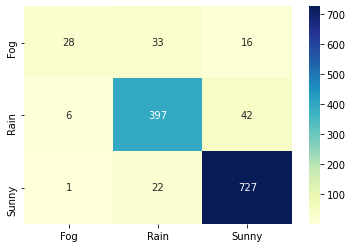

In [195]:
print (classification_report(Y_test, y_preds_knn))
confu_mtx = pd.DataFrame(confusion_matrix(Y_test, y_preds_knn), 
  index = [ 'Fog','Rain','Sunny'],
  columns = [ 'Fog','Rain','Sunny'])
                         
#  index = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#  columns = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])

#index = [ 'Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#columns = ['Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])

sns.heatmap(confu_mtx , annot=True, fmt='d', cmap='YlGnBu')


In [196]:
gnb = GaussianNB()
gnb.fit(X_train_PCA, Y_train)
Y_preds_nb = gnb.predict(X_test_PCA)
Y_preds_nb

C:\Users\pato-\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array(['Sunny', 'Sunny', 'Fog', ..., 'Sunny', 'Rain', 'Sunny'],
      dtype='<U5')

In [197]:
print (classification_report(Y_test, Y_preds_nb))

              precision    recall  f1-score   support

         Fog       0.55      0.62      0.58        77
        Rain       0.86      0.76      0.81       445
       Sunny       0.89      0.93      0.91       750

    accuracy                           0.86      1272
   macro avg       0.76      0.77      0.77      1272
weighted avg       0.86      0.86      0.86      1272



<AxesSubplot:>

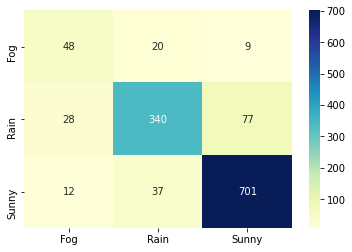

In [198]:
confu_mtx = pd.DataFrame(confusion_matrix(Y_test, Y_preds_nb), 
  index = [ 'Fog','Rain','Sunny'],
  columns = [ 'Fog','Rain','Sunny'])
                         
#  index = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#  columns = [ 'Fog','Rain','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])

                         
#index = [ 'Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'],
#columns = ['Fog','Fog-Rain','Fog-Thunderstorm','Rain','Rain-Hail-Thunderstorm','Rain-Snow','Rain-Thunderstorm','Snow','Sunny','Thunderstorm'])

sns.heatmap(confu_mtx , annot=True, fmt='d', cmap='YlGnBu')

In [150]:
#df_2[df_1['eventos_completo']=="Tornado"].count()